In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
file_path="/content/diabetes.csv"
df =pd.read_csv(file_path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
train, validate, test = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df)), int(.9*len(df))])

In [4]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
384,1,125,70,24,110,24.3,0.221,25,0
224,1,100,66,15,56,23.6,0.666,26,0
729,2,92,52,0,0,30.1,0.141,22,0
630,7,114,64,0,0,27.4,0.732,34,1


In [5]:
validate

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
347,3,116,0,0,0,23.5,0.187,23,0
505,10,75,82,0,0,33.3,0.263,38,0
756,7,137,90,41,0,32.0,0.391,39,0
710,3,158,64,13,387,31.2,0.295,24,0
693,7,129,68,49,125,38.5,0.439,43,1
...,...,...,...,...,...,...,...,...,...
251,2,129,84,0,0,28.0,0.284,27,0
461,1,71,62,0,0,21.8,0.416,26,0
455,14,175,62,30,0,33.6,0.212,38,1
765,5,121,72,23,112,26.2,0.245,30,0


In [6]:
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
201,1,138,82,0,0,40.1,0.236,28,0
161,7,102,74,40,105,37.2,0.204,45,0
555,7,124,70,33,215,25.5,0.161,37,0
401,6,137,61,0,0,24.2,0.151,55,0
476,2,105,80,45,191,33.7,0.711,29,1
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,0
106,1,96,122,0,0,22.4,0.207,27,0
270,10,101,86,37,0,45.6,1.136,38,1
435,0,141,0,0,0,42.4,0.205,29,1


In [7]:
X_train = train[train.columns[:-1]]
y_train = train[train.columns[-1]]

X_validate = validate[validate.columns[:-1]]
y_validate = validate[validate.columns[-1]]

X_test = test[test.columns[:-1]]
y_test = test[test.columns[-1]]

## **SVM LINEAR KERNEL(WITH AND WITHOUT HYPERPARAMETER TUNING ON ORIGINAL DATASET)**

**. SVM classifier (using a linear kernel)**

In [8]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from sklearn.svm import LinearSVC

svm_linear = LinearSVC()
svm_linear.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

**ACCURACY OF LINEAR KERNEL ON ORIGINAL DATASET**

In [9]:
y_pred_linear = svm_linear.predict(X_test)
from sklearn.metrics import accuracy_score
acc_linear = accuracy_score(y_pred_linear, y_test)
print("THE ACCURACY OF LINEAR KERNEL",acc_linear)

THE ACCURACY OF LINEAR KERNEL 0.6103896103896104


**VISUALISATION  OF BOUNDARY USING LINEAR KERNEL ON ORIGINAL DATASET**

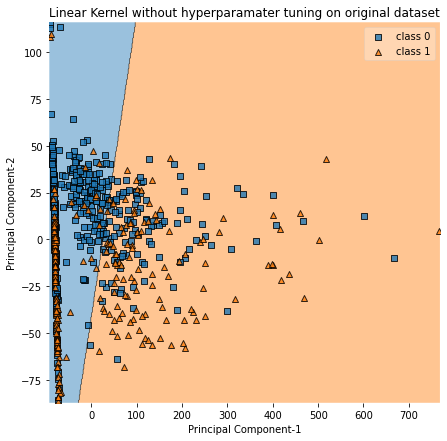

In [56]:
vis_linear = svm_linear
pca_linear = PCA(n_components=2)
pca_linear.fit(df.iloc[:,:-1])
df_x = pca_linear.transform(df.iloc[:,:-1])
df_y = df['Outcome'].to_numpy()

vis_linear.fit(df_x,df_y)
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x,df_y, clf=vis_linear, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Linear Kernel without hyperparamater tuning on original dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

**SVM linear classfier tuning using validation dataset**

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001 * 10 ** (n - 1) for n in range(1, 7 + 1)], 'tol':[0.01 * 10** (n - 1) for n in range(1, 6 + 1)]}
svm_linear_tuned = GridSearchCV(LinearSVC(),param_grid,cv=2)
svm_linear_tuned.fit(X_validate,y_validate)

GridSearchCV(cv=2, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                         'tol': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
svm_linear_tuned.cv_results_

{'mean_fit_time': array([0.00861251, 0.00361443, 0.00269318, 0.00169325, 0.00168991,
        0.00178921, 0.00396252, 0.00428581, 0.00388348, 0.00184536,
        0.00166678, 0.00167894, 0.00365973, 0.00370681, 0.00371242,
        0.00154042, 0.00148928, 0.00146842, 0.00364602, 0.0037508 ,
        0.00390315, 0.00149953, 0.00152397, 0.00146639, 0.00365949,
        0.00374937, 0.00395346, 0.00154674, 0.0014677 , 0.0014739 ,
        0.00368762, 0.00366139, 0.00375712, 0.00150049, 0.00231993,
        0.00269115, 0.00441551, 0.00410819, 0.00391519, 0.00188386,
        0.00154853, 0.00159216]),
 'mean_score_time': array([0.0012399 , 0.00133741, 0.00130177, 0.00103199, 0.00101864,
        0.00101078, 0.00115168, 0.00124049, 0.00112402, 0.00103462,
        0.00104535, 0.00094938, 0.00097179, 0.00096285, 0.00098205,
        0.00090623, 0.00089157, 0.00090253, 0.00096178, 0.00111485,
        0.00097513, 0.00091612, 0.00089407, 0.00088573, 0.00103819,
        0.00097597, 0.00104225, 0.00090766, 0.

In [13]:
svm_linear_best = svm_linear_tuned.best_estimator_
print("THE BEST ESTIMATOR FOR LINEAR KERNEL IS ",'\n',svm_linear_best)

THE BEST ESTIMATOR FOR LINEAR KERNEL IS  
 LinearSVC(C=0.001, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=1.0,
          verbose=0)


**ACCURACY OF TUNED LINEAR KERNEL ON ORIGINAL DATASET**

In [14]:
y_pred_linear_tuned = svm_linear_best.predict(X_test)
from sklearn.metrics import accuracy_score
acc_linear_tuned = accuracy_score(y_pred_linear_tuned, y_test)
print("THE ACCURACY OF TUNED LINEAR KERNEL",acc_linear_tuned)

THE ACCURACY OF TUNED LINEAR KERNEL 0.6363636363636364


**VISUALISATION  OF BOUNDARY USING TUNED LINEAR KERNEL ON ORIGINAL DATASET**

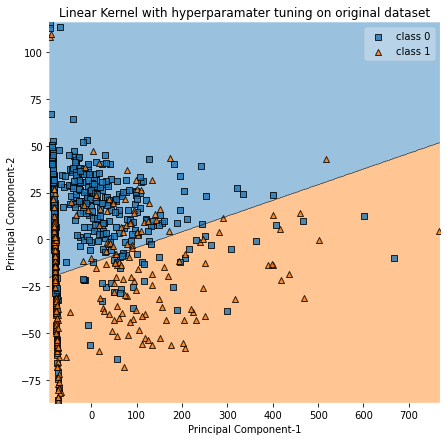

In [15]:
vis_linear_tuned = svm_linear_best
vis_linear_tuned.fit(df_x,df_y)
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x,df_y, clf=vis_linear_tuned, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Linear Kernel with hyperparamater tuning on original dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

## **SVM GAUSSIAN KERNEL(WITH AND WITHOUT HYPERPARAMETER TUNING ON ORIGINAL DATASET)**

**SVM classifier (using a SIMPLE GAUSSIAN KERNEL)**

In [16]:
from sklearn.svm import SVC

# Make and fit SVMs with Gaussian Kernel
svm_gaussian= SVC(kernel="rbf")
svm_gaussian.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**ACCURACY OF GAUSSIAN KERNEL ON ORIGINAL DATASET**

In [17]:
y_pred_gaussian = svm_gaussian.predict(X_test)
from sklearn.metrics import accuracy_score
acc_gaussian= accuracy_score(y_pred_gaussian, y_test)
print("THE ACCURACY OF GAUSSIAN KERNEL",acc_gaussian)

THE ACCURACY OF GAUSSIAN KERNEL 0.7662337662337663


In [18]:
# get number of support vectors for each class
print("THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(GAUSSIAN KERNEL)",'\n',svm_gaussian.n_support_)

THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(GAUSSIAN KERNEL) 
 [184 181]


**VISUALISATION  OF BOUNDARY USING GAUSSIAN KERNEL ON ORIGINAL DATASET**

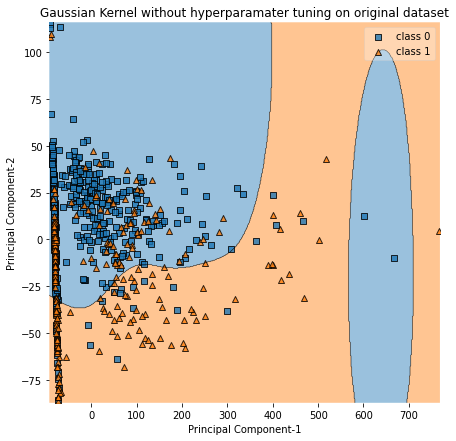

In [19]:
vis_gaussian = svm_gaussian

vis_gaussian.fit(df_x,df_y)
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x,df_y, clf=vis_gaussian, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Gaussian Kernel without hyperparamater tuning on original dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

**SVM GAUSSIAN classfier tuning using validation dataset**

In [20]:
gaussian_params = {'C' :[0.001 * 10 ** (n - 1) for n in range(1, 7 + 1)], 'degree' : list(np.arange(2,6,1))}
svm_gaussian_tuned = GridSearchCV(SVC(kernel="rbf"),gaussian_params,cv=2)
svm_gaussian_tuned.fit(X_validate,y_validate)

GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                         'degree': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
svm_gaussian_tuned.cv_results_

{'mean_fit_time': array([0.00458658, 0.00233543, 0.00168991, 0.00176239, 0.00175726,
        0.00181127, 0.00187945, 0.0018636 , 0.00190556, 0.00185359,
        0.0018301 , 0.00417554, 0.03445792, 0.00180244, 0.00169528,
        0.00165331, 0.00167692, 0.0016762 , 0.00166321, 0.00169265,
        0.00177848, 0.00181818, 0.00189424, 0.00206316, 0.00194883,
        0.00191808, 0.00192571, 0.00184333]),
 'mean_score_time': array([0.0025152 , 0.00183225, 0.00104523, 0.00105381, 0.00106883,
        0.00103247, 0.00113189, 0.00113451, 0.00110745, 0.00103974,
        0.00107872, 0.00195336, 0.00122249, 0.0011462 , 0.00098586,
        0.00096142, 0.00098014, 0.00097036, 0.00097501, 0.00097716,
        0.001001  , 0.00098169, 0.00096905, 0.0010345 , 0.00098312,
        0.00098622, 0.00095987, 0.00094569]),
 'mean_test_score': array([0.59750337, 0.59750337, 0.59750337, 0.59750337, 0.59750337,
        0.59750337, 0.59750337, 0.59750337, 0.59750337, 0.59750337,
        0.59750337, 0.59750337, 0.649

In [22]:
svm_gaussian_best = svm_gaussian_tuned.best_estimator_
print("THE BEST ESTIMATOR FOR GAUSSIAN KERNEL IS ",'\n',svm_gaussian_best)

THE BEST ESTIMATOR FOR GAUSSIAN KERNEL IS  
 SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


**ACCURACY OF TUNED GAUSSIAN KERNEL ON ORIGINAL DATASET**

In [23]:
y_pred_gaussian_tuned = svm_gaussian_best.predict(X_test)
from sklearn.metrics import accuracy_score
acc_gaussian_tuned = accuracy_score(y_pred_gaussian_tuned, y_test)
print("THE ACCURACY OF TUNED GAUSSIAN KERNEL",acc_gaussian_tuned)

THE ACCURACY OF TUNED GAUSSIAN KERNEL 0.7532467532467533


In [24]:
print("THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(TUNED GAUSSIAN KERNEL)",'\n',svm_gaussian_best.n_support_)

THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(TUNED GAUSSIAN KERNEL) 
 [27 25]


**VISUALISATION  OF BOUNDARY USING TUNED GAUSSIAN KERNEL ON ORIGINAL DATASET**

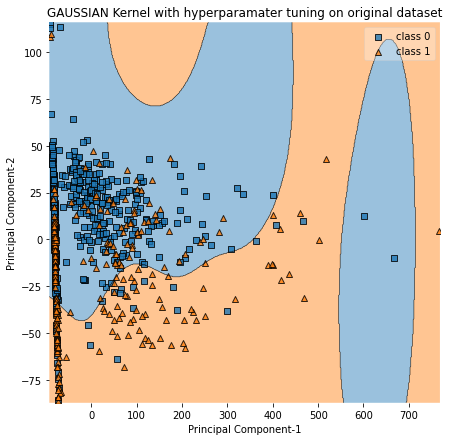

In [25]:
vis_gaussian_tuned = svm_gaussian_best
vis_gaussian_tuned.fit(df_x,df_y)
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x,df_y, clf=vis_gaussian_tuned, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("GAUSSIAN Kernel with hyperparamater tuning on original dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

## **SVM POLYNOMIAL KERNEL(WITH AND WITHOUT HYPERPARAMETER TUNING ON ORIGINAL DATASET)**

**SVM classifier (using a SIMPLE POLYNOMIAL KERNEL)**

In [26]:
from sklearn.svm import SVC

# Make and fit SVMs with Gaussian Kernel
svm_poly= SVC(kernel="poly")
svm_poly.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

"""**ACCURACY OF POLYNOMIAL KERNEL ON ORIGINAL DATASET**"""

In [27]:
y_pred_poly = svm_poly.predict(X_test)
from sklearn.metrics import accuracy_score
acc_poly= accuracy_score(y_pred_poly, y_test)
print("THE ACCURACY OF POLY KERNEL",acc_poly)

THE ACCURACY OF POLY KERNEL 0.7922077922077922


In [28]:
print("THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(POLY KERNEL)",'\n',svm_poly.n_support_)

THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(POLY KERNEL) 
 [169 167]


"""**VISUALISATION  OF BOUNDARY USING POLYNOMIAL KERNEL ON ORIGINAL DATASET**"""

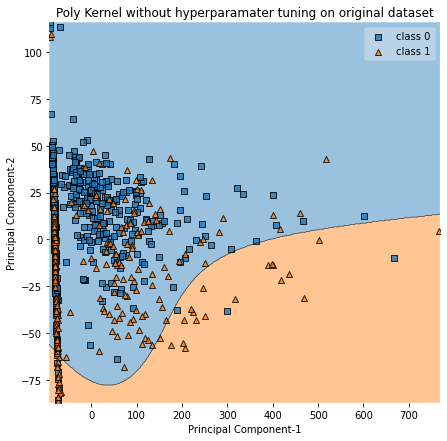

In [29]:
vis_poly = svm_poly

vis_poly.fit(df_x,df_y)
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x,df_y, clf=vis_poly, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Poly Kernel without hyperparamater tuning on original dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

"""**SVM POLY classfier tuning using validation dataset**"""

In [30]:
poly_params = {'C' :[0.001 * 10 ** (n - 1) for n in range(1, 7 + 1)], 'degree' : list(np.arange(2,6,1))}
svm_poly_tuned = GridSearchCV(SVC(kernel="poly"),poly_params,cv=2)
svm_poly_tuned.fit(X_validate,y_validate)

svm_poly_tuned.cv_results_

{'mean_fit_time': array([0.00299263, 0.00236392, 0.00159335, 0.00159132, 0.00157058,
        0.00153756, 0.00153863, 0.00157273, 0.00154519, 0.00153804,
        0.00154841, 0.00159919, 0.00159371, 0.00161159, 0.00268364,
        0.00274777, 0.0017426 , 0.00199807, 0.00395799, 0.00290251,
        0.00423956, 0.00354326, 0.00479221, 0.00399864, 0.00594461,
        0.00753725, 0.00559783, 0.00704336]),
 'mean_score_time': array([0.00176394, 0.00135434, 0.00100255, 0.00093305, 0.00098562,
        0.0009017 , 0.0009079 , 0.00094116, 0.0009234 , 0.00090885,
        0.00093198, 0.00101948, 0.00092697, 0.00137079, 0.00229478,
        0.00132775, 0.0009464 , 0.00095129, 0.0013262 , 0.00157881,
        0.00110185, 0.00112188, 0.00117362, 0.00114465, 0.00122547,
        0.0012368 , 0.00115836, 0.00115168]),
 'mean_test_score': array([0.59750337, 0.59750337, 0.58468286, 0.61032389, 0.59750337,
        0.58468286, 0.61032389, 0.61066127, 0.63596491, 0.66261808,
        0.64979757, 0.64946019, 0.649

In [31]:
svm_poly_best = svm_poly_tuned.best_estimator_
print("THE BEST ESTIMATOR FOR POLYNOMIAL KERNEL IS ",'\n',svm_poly_best)

THE BEST ESTIMATOR FOR POLYNOMIAL KERNEL IS  
 SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


"""**ACCURACY OF TUNED POLY KERNEL ON ORIGINAL DATASET**"""

In [32]:
y_pred_poly_tuned = svm_poly_best.predict(X_test)
from sklearn.metrics import accuracy_score
acc_poly_tuned = accuracy_score(y_pred_poly_tuned, y_test)
print("THE ACCURACY OF TUNED POLY KERNEL",acc_poly_tuned)

THE ACCURACY OF TUNED POLY KERNEL 0.7402597402597403


In [33]:
print("THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(TUNED POLY KERNEL)",'\n',svm_poly_best.n_support_)

THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(TUNED POLY KERNEL) 
 [24 24]


"""**VISUALISATION  OF BOUNDARY USING TUNED POLY KERNEL ON ORIGINAL DATASET**"""

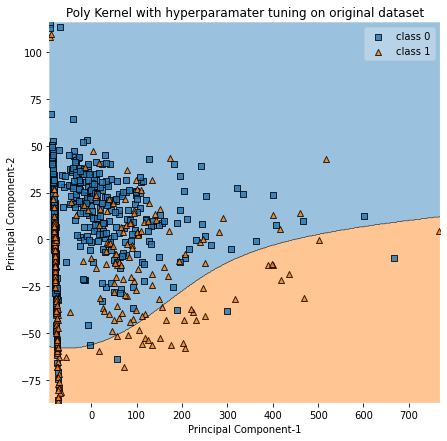

In [34]:
vis_poly_tuned = svm_poly_best
vis_poly_tuned.fit(df_x,df_y)
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x,df_y, clf=vis_poly_tuned, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Poly Kernel with hyperparamater tuning on original dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()


## **EXTRA ANALYSIS FOR STANDARDLIZED DATASET**

In [35]:
df_s = pd.DataFrame((StandardScaler().fit(df.iloc[:,:-1])).transform(df.iloc[:,:-1]),columns = df.iloc[:,:-1].columns)

df_s['Outcome'] = df['Outcome']
df_s

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


In [36]:
train_s, validate_s, test_s = np.split(df_s.sample(frac=1, random_state=42), [int(.8*len(df_s)), int(.9*len(df_s))])

In [37]:
X_train_s = train_s[train_s.columns[:-1]]
y_train_s = train_s[train_s.columns[-1]]

X_validate_s = validate_s[validate_s.columns[:-1]]
y_validate_s = validate_s[validate_s.columns[-1]]

X_test_s = test_s[test_s.columns[:-1]]
y_test_s = test_s[test_s.columns[-1]]

In [38]:
svm_linear_s = LinearSVC()
svm_linear_s.fit(X_train_s, y_train_s)

param_grid_s = {'C':[0.001 * 10 ** (n - 1) for n in range(1, 7 + 1)], 'tol':[0.01 * 10** (n - 1) for n in range(1, 6 + 1)]}
svm_linear_tuned_s = GridSearchCV(LinearSVC(),param_grid_s,cv=2)
svm_linear_tuned_s.fit(X_validate_s,y_validate_s)

print("GRID SEARCH RESULTS FOR LINEAR KERNEL(standardized dataset)")
print(svm_linear_tuned_s.cv_results_)

svm_linear_best_s = svm_linear_tuned_s.best_estimator_
print("THE BEST ESTIMATOR FOR LINEAR KERNEL(STANDARDIZED DATASET) IS ",'\n',svm_linear_best_s)

GRID SEARCH RESULTS FOR LINEAR KERNEL(standardized dataset)
{'mean_fit_time': array([0.00214112, 0.00206876, 0.00148153, 0.00148177, 0.0014056 ,
       0.00161469, 0.0017637 , 0.00168943, 0.00167072, 0.00172246,
       0.00155079, 0.00159192, 0.00154674, 0.00141895, 0.00143445,
       0.00137508, 0.0014267 , 0.00142562, 0.00177741, 0.00180221,
       0.00150466, 0.00145996, 0.00155556, 0.00144756, 0.00317526,
       0.00308943, 0.00197339, 0.00156784, 0.00148618, 0.00149083,
       0.00308979, 0.00305963, 0.00292623, 0.00135994, 0.00130415,
       0.00132036, 0.00291669, 0.00312197, 0.00424039, 0.00173986,
       0.00136769, 0.0013746 ]), 'std_fit_time': array([4.64320183e-04, 3.13043594e-04, 1.66893005e-05, 9.98973846e-05,
       2.61068344e-05, 2.31862068e-04, 9.64403152e-05, 3.83853912e-05,
       1.29938126e-05, 2.30193138e-04, 1.60932541e-05, 8.48770142e-05,
       7.14063644e-05, 3.42130661e-05, 5.47170639e-05, 1.94311142e-05,
       3.57627869e-06, 2.94446945e-05, 1.23977661e-05

In [39]:
y_pred_linear_s = svm_linear_s.predict(X_test_s)
from sklearn.metrics import accuracy_score
acc_linear_s = accuracy_score(y_pred_linear_s, y_test_s)
print("THE ACCURACY OF LINEAR KERNEL( STANDARDLISED dataset)",acc_linear_s)


y_pred_linear_tuned_s = svm_linear_best_s.predict(X_test_s)
from sklearn.metrics import accuracy_score
acc_linear_tuned_s = accuracy_score(y_pred_linear_tuned_s, y_test_s)
print("THE ACCURACY OF TUNED LINEAR KERNEL(( STANDARDLISED dataset))",acc_linear_tuned_s)

THE ACCURACY OF LINEAR KERNEL( STANDARDLISED dataset) 0.7792207792207793
THE ACCURACY OF TUNED LINEAR KERNEL(( STANDARDLISED dataset)) 0.6753246753246753


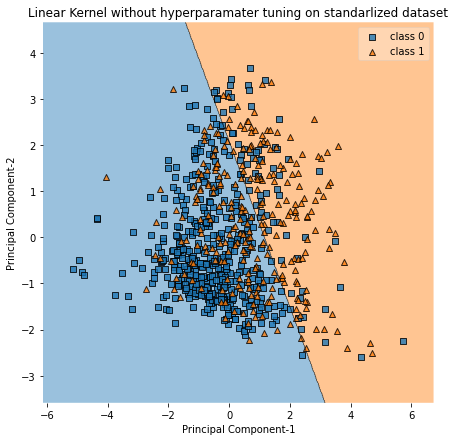

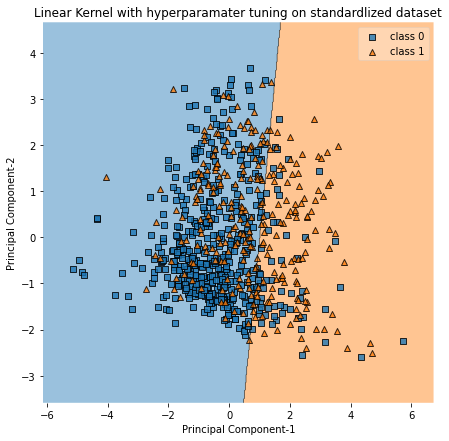

In [40]:
vis_linear_s = svm_linear_s
pca_linear_s = PCA(n_components=2)
pca_linear_s.fit(df_s.iloc[:,:-1])
df_x_s = pca_linear_s.transform(df_s.iloc[:,:-1])
df_y_s = df_s['Outcome'].to_numpy()

vis_linear_s.fit(df_x_s,df_y_s)
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x_s,df_y_s, clf=vis_linear_s, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Linear Kernel without hyperparamater tuning on standarlized dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()


vis_linear_tuned_s = svm_linear_best_s
vis_linear_tuned_s.fit(df_x_s,df_y_s)
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x_s,df_y_s, clf=vis_linear_tuned_s, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Linear Kernel with hyperparamater tuning on standardlized dataset")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

In [41]:
svm_gaussian_s= SVC(kernel="rbf")
svm_gaussian_s.fit(X_train_s, y_train_s)

gaussian_params_s = {'C' :[0.001 * 10 ** (n - 1) for n in range(1, 7 + 1)], 'degree' : list(np.arange(2,6,1))}
svm_gaussian_tuned_s = GridSearchCV(SVC(kernel="rbf"),gaussian_params_s,cv=2)
svm_gaussian_tuned_s.fit(X_validate_s,y_validate_s)


print("GRID SEARCH RESULTS FOR GAUSSIAN KERNEL(standardized dataset)")
print(svm_gaussian_tuned_s.cv_results_)

svm_gaussian_best_s = svm_gaussian_tuned_s.best_estimator_
print("THE BEST ESTIMATOR FOR GAUSSIAN KERNEL(standardlized dataset) IS ",'\n',svm_gaussian_best_s)


GRID SEARCH RESULTS FOR GAUSSIAN KERNEL(standardized dataset)
{'mean_fit_time': array([0.00173891, 0.00152183, 0.00151694, 0.00155878, 0.00168085,
       0.00150859, 0.00146437, 0.00145698, 0.00152838, 0.00152373,
       0.00157619, 0.00149238, 0.00147176, 0.00147927, 0.00151324,
       0.00150919, 0.00150394, 0.00326455, 0.00148284, 0.0014919 ,
       0.00147271, 0.00144672, 0.0017345 , 0.00254953, 0.00312316,
       0.00153637, 0.00165105, 0.00145268]), 'std_fit_time': array([1.35064125e-04, 1.02519989e-05, 2.41994858e-05, 1.31130219e-05,
       1.45196915e-04, 5.28097153e-05, 2.14576721e-06, 7.39097595e-06,
       3.39746475e-05, 1.14440918e-05, 9.44137573e-05, 4.41074371e-06,
       4.52995300e-06, 1.34706497e-05, 2.57492065e-05, 7.15255737e-06,
       1.57356262e-05, 1.02102757e-03, 6.79492950e-06, 2.06232071e-05,
       4.52995300e-06, 1.93119049e-05, 2.75850296e-04, 2.89678574e-05,
       6.23345375e-04, 8.82148743e-06, 1.42097473e-04, 9.77516174e-06]), 'mean_score_time': array(

In [42]:

y_pred_gaussian_s = svm_gaussian_s.predict(X_test_s)
from sklearn.metrics import accuracy_score
acc_gaussian_s= accuracy_score(y_pred_gaussian_s, y_test_s)
print("THE ACCURACY OF GAUSSIAN KERNEL(standardlized dataset)",acc_gaussian_s)

y_pred_gaussian_tuned_s = svm_gaussian_best_s.predict(X_test_s)
from sklearn.metrics import accuracy_score
acc_gaussian_tuned_s = accuracy_score(y_pred_gaussian_tuned_s, y_test_s)
print("THE ACCURACY OF TUNED GAUSSIAN KERNEL(standardlized dataset)",acc_gaussian_tuned_s)

THE ACCURACY OF GAUSSIAN KERNEL(standardlized dataset) 0.8051948051948052
THE ACCURACY OF TUNED GAUSSIAN KERNEL(standardlized dataset) 0.7012987012987013


In [43]:
print("THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(GAUSSIAN KERNEL_s)",'\n',svm_gaussian_s.n_support_)
print("THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(TUNED GAUSSIAN KERNEL_s)",'\n',svm_gaussian_best_s.n_support_)

THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(GAUSSIAN KERNEL_s) 
 [178 178]
THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(TUNED GAUSSIAN KERNEL_s) 
 [28 28]


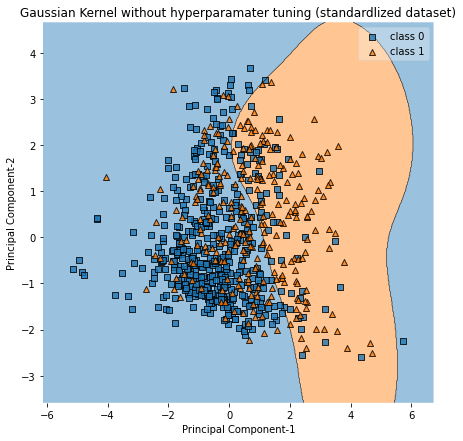

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)


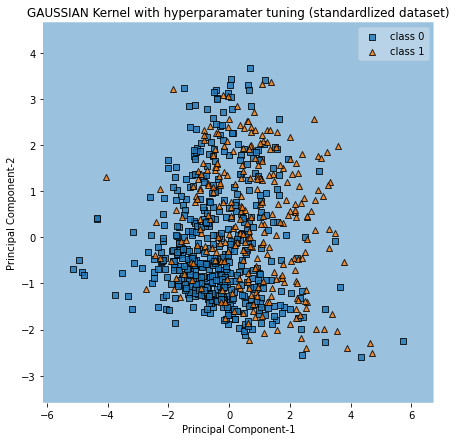

In [44]:
vis_gaussian_s = svm_gaussian_s

vis_gaussian_s.fit(df_x_s,df_y_s)
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x_s,df_y_s, clf=vis_gaussian_s, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Gaussian Kernel without hyperparamater tuning (standardlized dataset)")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

vis_gaussian_tuned_s = svm_gaussian_best_s
vis_gaussian_tuned_s.fit(df_x,df_y)
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x_s,df_y_s, clf=vis_gaussian_tuned_s, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("GAUSSIAN Kernel with hyperparamater tuning (standardlized dataset)")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

In [45]:
svm_poly_s= SVC(kernel="poly")
svm_poly_s.fit(X_train_s, y_train_s)

poly_params_s = {'C' :[0.001 * 10 ** (n - 1) for n in range(1, 7 + 1)], 'degree' : list(np.arange(2,6,1))}
svm_poly_tuned_s = GridSearchCV(SVC(kernel="poly"),poly_params_s,cv=2)
svm_poly_tuned_s.fit(X_validate_s,y_validate_s)

print("GRID SEARCH RESULTS FOR POLY KERNEL(standardized dataset)")
print(svm_poly_tuned_s.cv_results_)

svm_poly_best_s = svm_poly_tuned_s.best_estimator_
print("THE BEST ESTIMATOR FOR POLYNOMIAL KERNEL(standardlized dataset) IS ",'\n',svm_poly_best_s)

GRID SEARCH RESULTS FOR POLY KERNEL(standardized dataset)
{'mean_fit_time': array([0.00292432, 0.00205112, 0.00148499, 0.00143862, 0.00147474,
       0.00149083, 0.00146639, 0.00147367, 0.00152743, 0.00149083,
       0.00165725, 0.00144053, 0.00147259, 0.00176966, 0.00159144,
       0.00158024, 0.00159466, 0.00154555, 0.00158858, 0.00155413,
       0.00160098, 0.00159657, 0.00148213, 0.00145721, 0.00150764,
       0.00169933, 0.00142515, 0.0014447 ]), 'std_fit_time': array([4.72664833e-04, 4.23431396e-04, 1.07288361e-06, 3.09944153e-06,
       1.78813934e-06, 2.69412994e-05, 1.44243240e-05, 1.74045563e-05,
       1.53779984e-05, 2.40802765e-05, 1.48057938e-04, 7.62939453e-06,
       2.20537186e-05, 2.47597694e-04, 4.74452972e-05, 3.62396240e-05,
       2.63452530e-05, 1.54972076e-06, 5.19752502e-05, 4.08887863e-05,
       7.58171082e-05, 3.51667404e-05, 1.19209290e-07, 8.10623169e-06,
       8.46385956e-06, 2.18033791e-04, 1.22785568e-05, 2.25305557e-05]), 'mean_score_time': array([0.0

In [46]:
y_pred_poly_s = svm_poly_s.predict(X_test_s)
from sklearn.metrics import accuracy_score
acc_poly_s= accuracy_score(y_pred_poly_s, y_test_s)
print("THE ACCURACY OF POLY KERNEL(standardlized dataset)",acc_poly_s)

y_pred_poly_tuned_s = svm_poly_best_s.predict(X_test_s)
from sklearn.metrics import accuracy_score
acc_poly_tuned_s = accuracy_score(y_pred_poly_tuned_s, y_test_s)
print("THE ACCURACY OF TUNED POLY KERNEL(standardlized dataset)",acc_poly_tuned_s)


THE ACCURACY OF POLY KERNEL(standardlized dataset) 0.7792207792207793
THE ACCURACY OF TUNED POLY KERNEL(standardlized dataset) 0.6753246753246753


In [47]:
print("THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(POLY KERNEL_s)",'\n',svm_poly_s.n_support_)
print("THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(TUNED POLY KERNEL_s)",'\n',svm_poly_best_s.n_support_)

THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(POLY KERNEL_s) 
 [172 169]
THE NUMBER OF SUPPORT VECTORS FOR EACH CLASS(TUNED POLY KERNEL_s) 
 [19 19]


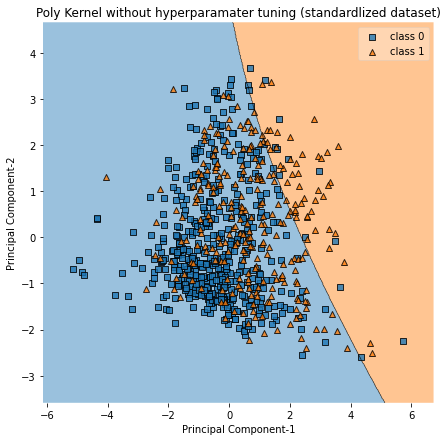

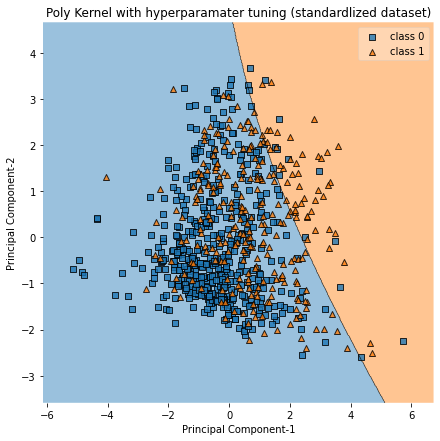

In [48]:
vis_poly_s = svm_poly_s

vis_poly_s.fit(df_x_s,df_y_s)
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x_s,df_y_s, clf=vis_poly_s, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Poly Kernel without hyperparamater tuning (standardlized dataset)")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()

vis_poly_tuned_s = svm_poly_best_s
vis_poly_tuned_s.fit(df_x_s,df_y_s)
plt.figure(figsize=(7,7))
ax = plot_decision_regions(df_x_s,df_y_s, clf=vis_poly_tuned_s, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['class 0', 'class 1'],framealpha=0.3, scatterpoints=1)
plt.title("Poly Kernel with hyperparamater tuning (standardlized dataset)")
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.show()